## Welkom bij de Data Science masterclass van IenW, Data en Innovatielab

[1. Klik hier om de guide te volgen voor de sprinkler data set](https://towardsdatascience.com/a-step-by-step-guide-in-detecting-causal-relationships-using-bayesian-structure-learning-in-python-c20c6b31cee5?sk=8ec59955835db3bb87424f5a43378cfd)


[2. A step-by-step guide in designing knowledge-driven models using Bayesian theorem.](https://towardsdatascience.com/a-step-by-step-guide-in-designing-knowledge-driven-models-using-bayesian-theorem-7433f6fd64be?sk=2abb83f72c76ccfefb627863bc4704d3)


[3. Chat with Your Dataset using Bayesian Inferences.
](https://towardsdatascience.com/chat-with-your-dataset-using-bayesian-inferences-bfd4dc7f8dcd?sk=13d28feab5c6b69992505cba36a5863d)


In [ ]:
# Package installeren
!pip install -U bnlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 899.8 kB/s eta 0:00:00
  Attempting uninstall: bnlearn
    Found existing installation: bnlearn 0.8.7
    Uninstalling bnlearn-0.8.7:
      Successfully uninstalled bnlearn-0.8.7


In [ ]:
# Importeer de package
import bnlearn as bn
print(bn.__version__)


0.8.8


In [ ]:
import bnlearn as bn
# Load sprinkler dataset
df = bn.import_example('sprinkler')
# Print to screen for illustration
print(df)


     Cloudy  Sprinkler  Rain  Wet_Grass
0         0          0     0          0
1         1          0     1          1
2         0          1     0          1
3         1          1     1          1
4         1          1     1          1
..      ...        ...   ...        ...
995       1          0     1          1
996       1          0     1          1
997       1          0     1          1
998       0          0     0          0
999       0          1     1          1

[1000 rows x 4 columns]


In [ ]:
# Learn the DAG in data using Bayesian structure learning:
DAG = bn.structure_learning.fit(df)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [ ]:
# print adjacency matrix
print(DAG['adjmat'])

# target     Cloudy  Sprinkler   Rain  Wet_Grass
# source
# Cloudy      False      False   True      False
# Sprinkler    True      False  False       True
# Rain        False      False  False       True
# Wet_Grass   False      False  False      False


target     Cloudy  Sprinkler   Rain  Wet_Grass
source                                        
Cloudy      False      False   True      False
Sprinkler    True      False  False       True
Rain        False      False  False       True
Wet_Grass   False      False  False      False


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


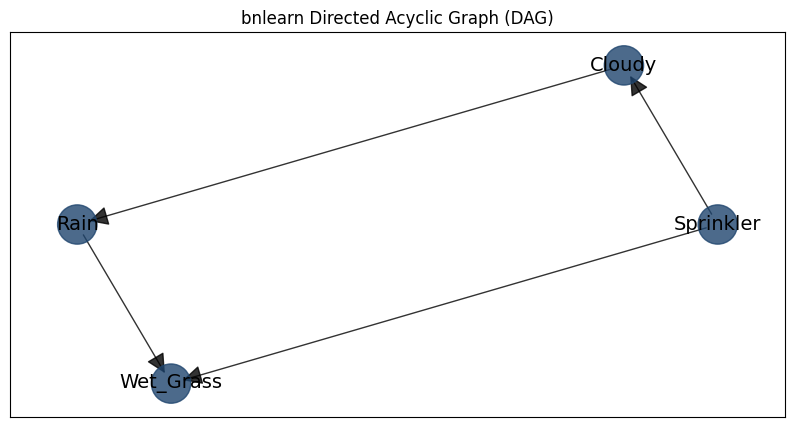

In [ ]:
# Plot
G = bn.plot(DAG, params_static={'figsize': (10,5)})

In [ ]:
# 'hc' or 'hillclimbsearch'
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
model_hc_k2   = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2')
model_hc_bdeu = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')

# 'ex' or 'exhaustivesearch'
model_ex_bic  = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')
model_ex_k2   = bn.structure_learning.fit(df, methodtype='ex', scoretype='k2')
model_ex_bdeu = bn.structure_learning.fit(df, methodtype='ex', scoretype='bdeu')

# 'cs' or 'constraintsearch'
model_cs_k2   = bn.structure_learning.fit(df, methodtype='cs', scoretype='k2')
model_cs_bdeu = bn.structure_learning.fit(df, methodtype='cs', scoretype='bdeu')
model_cs_bic  = bn.structure_learning.fit(df, methodtype='cs', scoretype='bic')

# 'cl' or 'chow-liu' (requires setting root_node parameter)
model_cl      = bn.structure_learning.fit(df, methodtype='cl', root_node='Wet_Grass')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. Method [cs] not supported.
[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. Method [cs] not supported.
[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. Method [cs] not supported.
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/6.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).


## Parameter learning on the sprinkler dataset.
I will continue with the sprinkler dataset to learn its parameters, resulting in the detection of Conditional Probabilistic Tables (CPTs). To learn parameters, we need a Directed Acyclic Graph (DAG) and a dataset with exactly the same variables. The idea is to connect the dataset with the DAG. In the previous example, we readily computed the DAG (Figure 3). You can use it in this example or alternatively, you can create your own DAG based on your knowledge of the world! In the example, I will demonstrate how to create your own DAG which can be based on expert/domain knowledge.

If you reached this point, you have computed the CPTs based on the DAG and the input dataset df using Maximum Likelihood Estimation (MLE) (Figure 4). Note that the CPTs are included in Figure 4 for clarity purposes.

Computing the CPTs using MLE is straightforward, let me demonstrate this by example by computing the CPTs manually for the nodes Cloudy and Rain.



Index(['Cloudy', 'Sprinkler', 'Rain', 'Wet_Grass'], dtype='object')
[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


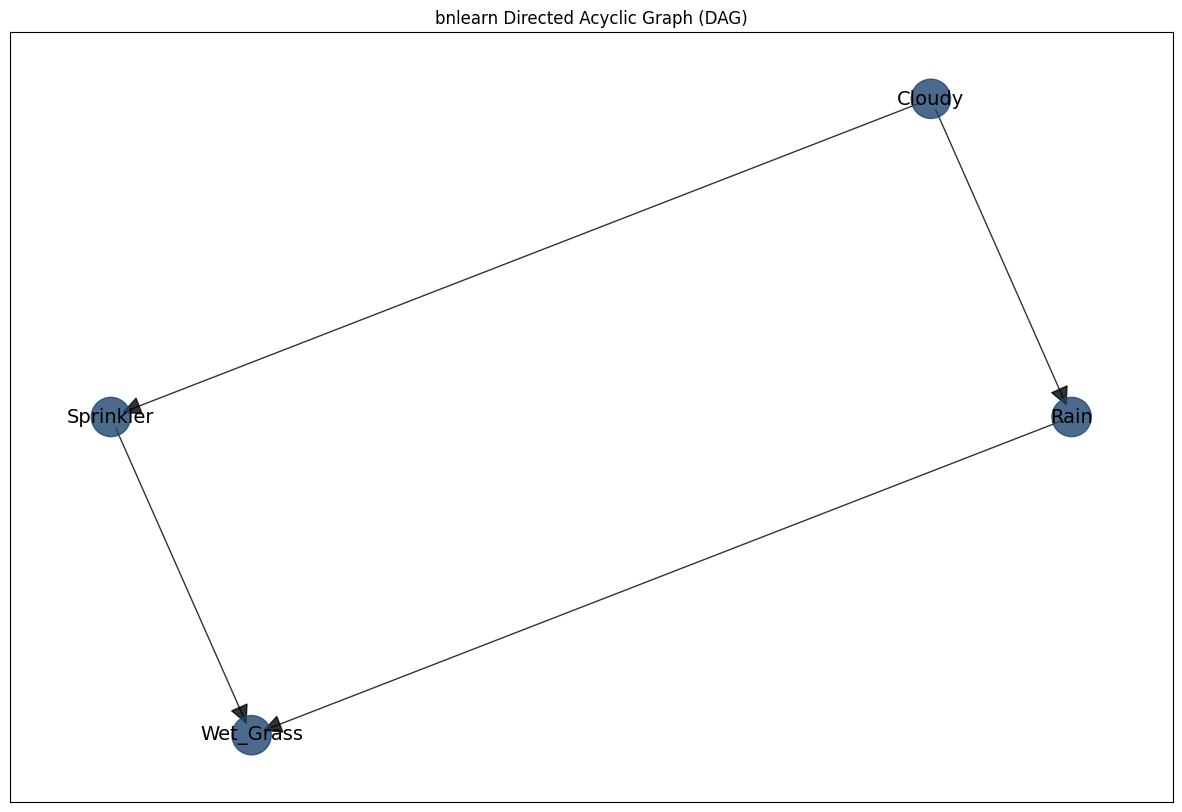

[bnlearn] >No CPDs to print. Hint: Add CPDs as following: <bn.make_DAG(DAG, CPD=[cpd_A, cpd_B, etc])> and use bnlearn.plot(DAG) to make a plot.
[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >CPD of Cloudy:
+-----------+-------+
| Cloudy(0) | 0.488 |
+-----------+-------+
| Cloudy(1) | 0.512 |
+-----------+-------+
[bnlearn] >CPD of Sprinkler:
+--------------+--------------------+------------+
| Cloudy       | Cloudy(0)          | Cloudy(1)  |
+--------------+--------------------+------------+
| Sprinkler(0) | 0.4610655737704918 | 0.91015625 |
+--------------+--------------------+------------+
| Sprinkler(1) | 0.5389344262295082 | 0.08984375 |
+--------------+--------------------+------------+
[bnlearn] >CPD of Rain:
+---------+---------------------+-------------+
| Cloudy  | Cloudy(0)           | Cloudy(1)   |
+---------+---------------------+-------------+
| Rain(0) | 0.8073770491803278  | 0.177734375 |
+---------+---------------------+-------

{'Cloudy':    Cloudy      p
 0       0  0.488
 1       1  0.512,
 'Sprinkler':    Sprinkler  Cloudy         p
 0          0       0  0.461066
 1          0       1  0.910156
 2          1       0  0.538934
 3          1       1  0.089844,
 'Rain':    Rain  Cloudy         p
 0     0       0  0.807377
 1     0       1  0.177734
 2     1       0  0.192623
 3     1       1  0.822266,
 'Wet_Grass':    Wet_Grass  Rain  Sprinkler         p
 0          0     0          0  1.000000
 1          0     0          1  0.156250
 2          0     1          0  0.113953
 3          0     1          1  0.023529
 4          1     0          0  0.000000
 5          1     0          1  0.843750
 6          1     1          0  0.886047
 7          1     1          1  0.976471}

In [ ]:
import bnlearn as bn
# Load sprinkler dataset
df = bn.import_example('sprinkler')
# The edges can be created using the available variables.
print(df.columns)
# ['Cloudy', 'Sprinkler', 'Rain', 'Wet_Grass']

# Define the causal dependencies based on your expert/domain knowledge.
# Left is the source, and right is the target node.
edges = [('Cloudy', 'Sprinkler'),
         ('Cloudy', 'Rain'),
         ('Sprinkler', 'Wet_Grass'),
         ('Rain', 'Wet_Grass')]


# Create the DAG
DAG = bn.make_DAG(edges)

# Plot the DAG. This is identical as shown in Figure 3
bn.plot(DAG)

# Print the Conditional probability Tables
bn.print_CPD(DAG)
# [bnlearn] >No CPDs to print. Tip: use bnlearn.plot(DAG) to make a plot.
# This is correct, we did not learn any CPTs yet! We only defined the graph without defining any probabilities.

# Parameter learning on the user-defined DAG and input data using maximumlikelihood
model_mle = bn.parameter_learning.fit(DAG, df, methodtype='maximumlikelihood')

# Print the learned CPDs
bn.print_CPD(model_mle)

In [ ]:
# Examples to illustrate how to manually compute MLE for the node Cloudy and Rain:

# Compute CPT for the Cloudy Node:
# This node has no conditional dependencies and can easily be computed as following:

# P(Cloudy=0)
sum(df['Cloudy']==0) / df.shape[0] # 0.488

0.488

In [ ]:
# P(Cloudy=1)
sum(df['Cloudy']==1) / df.shape[0] # 0.512

0.512

In [ ]:
# Compute CPT for the Rain Node:
# This node has a conditional dependency from Cloudy and can be computed as following:

# P(Rain=0 | Cloudy=0)
sum( (df['Cloudy']==0) & (df['Rain']==0) ) / sum(df['Cloudy']==0) # 394/488 = 0.807377049

0.8073770491803278

In [ ]:
# P(Rain=1 | Cloudy=0)
sum( (df['Cloudy']==0) & (df['Rain']==1) ) / sum(df['Cloudy']==0) # 94/488  = 0.192622950

0.19262295081967212

In [ ]:
# P(Rain=0 | Cloudy=1)
sum( (df['Cloudy']==1) & (df['Rain']==0) ) / sum(df['Cloudy']==1) # 91/512  = 0.177734375

0.177734375

In [ ]:
# P(Rain=1 | Cloudy=1)
sum( (df['Cloudy']==1) & (df['Rain']==1) ) / sum(df['Cloudy']==1) # 421/512 = 0.822265625

0.822265625

##Inferences on the sprinkler dataset.
Making inferences requires the Bayesian network to have two main components: A Directed Acyclic Graph (DAG) that describes the structure of the data and Conditional Probability Tables (CPT) that describe the statistical relationship between each node and its parents. At this point you have the dataset, you computed the DAG using structure learning and estimated the CPTs using parameter learning. You can now make inferences!

With inferences, we marginalize variables in a procedure that is called variable elimination. Variable elimination is an exact inference algorithm. It can also be used to figure out the state of the network that has maximum probability by simply exchanging the sums by max functions. Its downside is that for large BNs it might be computationally intractable. Approximate inference algorithms such as Gibbs sampling or rejection sampling might be used in these cases [7].

With bnlearn we can make inferences as follow:

In [ ]:
import bnlearn as bn

# Load sprinkler dataset
df = bn.import_example('sprinkler')

# Define the causal dependencies based on your expert/domain knowledge.
# Left is the source, and right is the target node.
edges = [('Cloudy', 'Sprinkler'),
         ('Cloudy', 'Rain'),
         ('Sprinkler', 'Wet_Grass'),
         ('Rain', 'Wet_Grass')]


# Create the DAG
DAG = bn.make_DAG(edges)

# Parameter learning on the user-defined DAG and input data using Bayes to estimate the CPTs
model = bn.parameter_learning.fit(DAG, df, methodtype='bayes')
bn.print_CPD(model)

q1 = bn.inference.fit(model, variables=['Wet_Grass'], evidence={'Sprinkler':0})
print(q1.df)
# +--------------+------------------+
# | Wet_Grass    |   phi(Wet_Grass) |
# +==============+==================+
# | Wet_Grass(0) |           0.4869 |
# +--------------+------------------+
# | Wet_Grass(1) |           0.5131 |
# +--------------+------------------+


q2 = bn.inference.fit(model, variables=['Rain'], evidence={'Sprinkler':0, 'Cloudy':1})
print(q2.df)
# +---------+-------------+
# | Rain    |   phi(Rain) |
# +=========+=============+
# | Rain(0) |      0.3370 |
# +---------+-------------+
# | Rain(1) |      0.6630 |
# +---------+-------------+

# Inferences with two or more variables can also be made such as:
q3 = bn.inference.fit(model, variables=['Wet_Grass','Rain'], evidence={'Sprinkler':1})
print(q3.df)
# +--------------+---------+-----------------------+
# | Wet_Grass    | Rain    |   phi(Wet_Grass,Rain) |
# +==============+=========+=======================+
# | Wet_Grass(0) | Rain(0) |                0.1811 |
# +--------------+---------+-----------------------+
# | Wet_Grass(0) | Rain(1) |                0.1757 |
# +--------------+---------+-----------------------+
# | Wet_Grass(1) | Rain(0) |                0.3555 |
# +--------------+---------+-----------------------+
# | Wet_Grass(1) | Rain(1) |                0.2877 |
# +--------------+---------+-----------------------+

[bnlearn] >bayes DAG created.
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Cloudy:
+-----------+-------+
| Cloudy(0) | 0.494 |
+-----------+-------+
| Cloudy(1) | 0.506 |
+-----------+-------+
[bnlearn] >CPD of Sprinkler:
+--------------+--------------------+--------------------+
| Cloudy       | Cloudy(0)          | Cloudy(1)          |
+--------------+--------------------+--------------------+
| Sprinkler(0) | 0.4807692307692308 | 0.7075098814229249 |
+--------------+--------------------+--------------------+
| Sprinkler(1) | 0.5192307692307693 | 0.2924901185770751 |
+--------------+--------------------+--------------------+
[bnlearn] >CPD of Rain:
+---------+--------------------+---------------------+
| Cloudy  | Cloudy(0)          | Cloudy(1)           |
+---------+--------------------+---------------------+
| Rain(0) | 0.6518218623481782 | 0.33695652173913043 |
+---------+--------------------+---------------------+
| Rain(1) | 0.3481781376518

## How do I know my causal model is right?
If you solely used data to compute the causal diagram, it is hard to fully verify the validity and completeness of your causal diagram. However, some solutions can help to get more trust in the causal diagram. For example, it may be possible to empirically test certain conditional independence or dependence relationships between sets of variables. If they are not in the data, it is an indication of the correctness of the causal model [8]. Alternatively, prior expert knowledge can be added, such as a DAG or CPTs, to get more trust in the model when making inferences.

A weakness of Bayesian networks is that finding the optimum DAG is computationally expensive since an exhaustive search over all the possible structures must be performed. The limit of nodes for exhaustive search can already be around 15 nodes but also depends on the number of states. If you have more nodes, alternative methods with a scoring function and search algorithm are required. Nevertheless, to deal with problems with hundreds or maybe even thousands of variables, a different approach, such as tree-based or constraint-based approaches is necessary with the use of black/whitelisting of variables. Such an approach first determines the order and then finds the optimal BN structure for that ordering. This implies working on the search space of the possible orderings, which is convenient as it is smaller than the space of network structures.